# [NLP] Assignment 1: Tokenization

## Task 1. Tokenize some tweets manually (20 points)

    1. Input tweet
       Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com

    1. Tokenized tweet
       Camping , in , Maine , for , the , weekend , . , Hey , Dad , , , Mama , Loves , YOU , : , http://www.mamapalooza.com

    2. Input tweet
       Its american tradition bitch

    2. Tokenized tweet
       Its , american , tradition , bitch

    3. Input tweet
       @ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones

    3. Tokenized tweet
       @ThroughTheVoid , They , love , it , ! , The , only , pleasure , they , get , in , life , . , I , actually , do , that , . , I , ' , m , sure , I , hear , a , tiny , squeak , . , . , . , Then , louder , ones

    4. Input tweet
       " RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"

    4. Tokenized tweet
       " , RT , @latti , : , @AbsoHilare , stop , tweeting , in , church , ! , Lol , < , - , - , - , " , " , I , tweet , because , I , ' , m , happy , , , I , tweet , because , I , ' , m , free , " , " , LOL , ! , "

    5. Input tweet
       Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m

    5. Tokenized tweet
       Samsung , Mini , S2 , portable , HDD , graced , with , colors , that , perfectly , match , your , tacky , beach , gear , : , Sammy , ' , s , done , it , aga , . , . , http://tinyurl.com/lb5p6m

    6. Input tweet
       @dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.

    6. Tokenized tweet
       @dialloc , congrats , on , finding , your , way , over , . , it , may , be , slow , going , at , first , . , hang , in , there , . , it , ' , s , kinda , cool , when , u , get , up , to , speed , .

    7. Input tweet
       iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki

    7. Tokenized tweet
       iPhone , activation , delays , continue , , , Apple , offers , $ , 30 , http://twt.gs/l3Ki

    8. Input tweet
       RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!

    8. Tokenized tweet
       RT , @GoogleAtWork , Gmail , maximum , attachment , size , now , 25MB , http://bit.ly/62mjw , Nice , ! , ! , !

    9. Input tweet
       RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI

    9. Tokenized tweet
       RT , @acfou , The , Ads , Won , Awards , for , Crispin , ; , But , Did , Nothing , for , Client , BurgerKing , ' , s , Sales, / , Marketshare , - , Big , Surprise , - , http://ping.fm/vw8TI

    10. Input tweet
        Hey doll! Great I missed True Blood yday boo lol Rt @FrankBanuat78 @jhillstephens Hello Sunshine how are u today? :-)

    10. Tokenized tweet
        Hey , doll , ! , Great , I , missed , True , Blood , yday , boo , lol , Rt , @FrankBanuat78 , @jhillstephens , Hello , Sunshine , how , are , u , today , ? , :-)

    11. Input tweet
        Australian artist Pogo made these free songs primarily from sampled audio from Alice In Wonderland. http://www.last.fm/music/Pogo/Wonderland

    11. Tokenized tweet
        Australian , artist , Pogo , made , these , free , songs , primarily , from , sampled , audio , from , Alice , In , Wonderland , . , http://www.last.fm/music/Pogo/Wonderland

    12. Input tweet
        @mppritchard they wanted to sell all the preorders & then sell all of the ones they had in stock to those that just walked in. Can't do both

    12. Tokenized tweet
        @mppritchard , they , wanted , to , sell , all , the , preorders , & , then , sell , all , of , the , ones , they , had , in , stock , to , those , that , just , walked , in , . , Can , ' , t , do , both

    13. Input tweet
        Incoming: Frightened Rabbit, Sept. 22 (Tucson): If Fat Cat Records is going to send three great bands from Scot.. http://tinyurl.com/nz6xcv

    13. Tokenized tweet
        Incoming , : , Frightened , Rabbit , , , Sept , . , 22 , ( , Tucson , ) , : , If , Fat , Cat , Records , is , going , to , send , three , great , bands , from , Scot , . , . , http://tinyurl.com/nz6xcv

    14. Input tweet
        Hey @ginoandfran please greet philip! (GinoandFran live > http://ustre.am/2YyQ)

    14. Tokenized tweet
        Hey , @ginoandfran , please , greet , philip , ! , ( , GinoandFran , live , > , http://ustre.am/2YyQ , )

    15. Input tweet
        Ik weet niet wie er achter de T-Mobile iPhone Twitter zit maar ik vind het niet echt 'corporate' taalgebruik... Best vreemd eigenlijk

    15. Tokenized tweet
        Ik , weet , niet , wie , er , achter , de , T , - , Mobile , iPhone , Twitter , zit , maar , ik , vind , het , niet , echt , ' , corporate , ' , taalgebruik , . , . , . , Best , vreemd , eigenlijk


## Task 2. Implement [Byte-Pair Encoding(BPE)](https://arxiv.org/pdf/1508.07909.pdf) Tokenizer (80 points)

### Task 2.1. Implementation (60 points)


In [1]:
from collections import Counter, defaultdict
from transformers import BertTokenizer


class BPETokenizer:
    """
    A Byte Pair Encoding (BPE) tokenizer that uses a corpus to train a vocabulary
    of a specified size, leveraging a pre-trained BERT tokenizer for initial word tokenization.
    """

    def __init__(self, corpus, vocab_size):
        """
        Initializes the BPETokenizer.

        Args:
            corpus (list of str): The text corpus to train the tokenizer.
            vocab_size (int): The target size of the vocabulary.
        """

        self.corpus = corpus
        self.vocab_size = vocab_size
        self.tokenizer = BertTokenizer.from_pretrained("bert-base-uncased") # Utilize a pre-trained BERT tokenizer for initial tokenization
        self.frequency_of_words = defaultdict(int) # Tracks word frequencies
        self.subword_sequences = {} # Stores subword sequences for each word
        self.conjoined_pairs = {} # Tracks merged subword pairs

    def train(self):
        """
        Trains the tokenizer on the provided corpus to generate a vocabulary of subwords.

        Returns:
            dict: A dictionary mapping merged subword pairs to their combined form.
        """

        for doc in self.corpus:
            word_encodings = self.tokenizer.tokenize(doc)
            for word in word_encodings:
                self.frequency_of_words[word] += 1

        # Generate a composite vocabulary from individual characters in words
        composite_vocabulary = sorted(set(char for word in self.frequency_of_words for char in word))
        self.subword_sequences = dict((word, list(word)) for word in self.frequency_of_words)

        unique_vocab = ["</w>"] + composite_vocabulary

        # Perform BPE merges until reaching the target vocabulary size
        while len(unique_vocab) < self.vocab_size:
            
            # Count occurrences of adjacent pairs in the corpus
            pair_counts = Counter()
            for word, freq in self.frequency_of_words.items():
                pieces = self.subword_sequences[word]
                for i in range(len(pieces) - 1):
                    pair_counts[pieces[i], pieces[i + 1]] += freq

            if not pair_counts:
                break

            common_pair = max(pair_counts, key=pair_counts.get)
            self.merge_corpus(common_pair)
            self.conjoined_pairs[common_pair] = common_pair[0] + common_pair[1]
            unique_vocab.append(common_pair[0] + common_pair[1])

        return dict(self.conjoined_pairs)

    def merge_corpus(self, target_pair):
        """
        Merges occurrences of a target pair of units in the corpus.

        Args:
            target_pair (tuple): The pair of units (subwords) to merge.

        Returns:
            dict: The updated subword sequences with the target pair merged.
        """
        (unit_one, unit_two) = target_pair
        for word in self.subword_sequences:
            sequence = self.subword_sequences[word]
            merge_iter = 0
            while merge_iter < len(sequence) - 1:
                if sequence[merge_iter:merge_iter + 2] == list(target_pair):
                    sequence[merge_iter:merge_iter + 2] = [unit_one + unit_two]
                else:
                    merge_iter += 1
            self.subword_sequences[word] = sequence
        return self.subword_sequences

    def tokenize(self, text):
        """
        Tokenizes a given text into subwords based on the trained vocabulary.

        Args:
            text (str): The text to tokenize.

        Returns:
            list: A list of subword tokens.
        """
        
        pre_split = self.tokenizer.tokenize(text)
        split_tokens = [list(piece) for piece in pre_split]

        # Apply the learned merges to further tokenize the text
        for (first, second), combined in self.conjoined_pairs.items():
            for idx, token_parts in enumerate(split_tokens):
                current_pos = 0
                while current_pos < len(token_parts) - 1:
                    if token_parts[current_pos:current_pos + 2] == [first, second]:
                        token_parts[current_pos:current_pos + 2] = [combined]
                    else:
                        current_pos += 1
                split_tokens[idx] = token_parts
                
        return [item for sublist in split_tokens for item in sublist]

### Task 2.2. Analysis on Tweets Dataset (10 points)

In [2]:
import os
from matplotlib import pyplot as plt

corpus = []
for file_name in os.listdir('./data-as1'):
    file_path = os.path.join('./data-as1', file_name)
    with open(file_path, 'r', encoding='utf-8') as file:
        tweets = file.readlines()
        corpus.extend(tweet.strip() for tweet in tweets)

In [3]:
corpus[:5]

['Mandates schools to create anti-bullying policy RT @Care2Causes: Support The Safe Schools Improvement Act http://tinyurl.com/m4nwrq',
 '" Neuer #Google-#Labs Dienst ""City Tours"" führt in logischer Reihenfolge durch Städte und zu Sehenswürdigkeiten: http://bit.ly/32YZe0"',
 'life is a constant game of falling short.',
 'RT @RBIjobs Head of Search Marketing - United Kingdom http://tinyurl.com/pumhh9 #ukjobs',
 'RT (Friend) injured His head is very cut His brain is stil good Is safe with good persons He will com back soon. #iranelection']

In [4]:
from tqdm import tqdm

vocab_sizes = [50, 100, 250, 500, 750, 1000]
average_lengths = []

for vocab_size in tqdm(vocab_sizes, desc='Processing vocab sizes'):
    tokenizer = BPETokenizer(corpus, vocab_size=vocab_size)
    tokenizer.train()
    tokenized_tweets = [tokenizer.tokenize(tweet) for tweet in corpus]
    print('Tokenized tweets example:', tokenized_tweets[:1])
    avg_length = sum(len(tokenized_tweet) for tokenized_tweet in tokenized_tweets) / len(tokenized_tweets)
    average_lengths.append(avg_length)

Processing vocab sizes:  17%|█▋        | 1/6 [00:00<00:02,  1.93it/s]

Tokenized tweets example: [['m', 'a', 'n', 'd', 'a', 't', 'e', 's', 's', 'c', 'h', 'o', 'o', 'l', 's', 't', 'o', 'c', 'r', 'e', 'a', 't', 'e', 'a', 'n', 't', 'i', '-', 'b', 'u', 'l', 'l', 'y', 'i', 'n', 'g', 'p', 'o', 'l', 'i', 'c', 'y', 'r', 't', '@', 'c', 'a', 'r', 'e', '#', '#', '2', '#', '#', 'c', 'a', '#', '#', 'u', 's', 'e', 's', ':', 's', 'u', 'p', 'p', 'o', 'r', 't', 't', 'h', 'e', 's', 'a', 'f', 'e', 's', 'c', 'h', 'o', 'o', 'l', 's', 'i', 'm', 'p', 'r', 'o', 'v', 'e', 'm', 'e', 'n', 't', 'a', 'c', 't', 'h', 't', 't', 'p', ':', '/', '/', 't', 'i', 'n', 'y', '#', '#', 'u', 'r', '#', '#', 'l', '.', 'c', 'o', 'm', '/', 'm', '#', '#', '4', '#', '#', 'n', '#', '#', 'w', 'r', '#', '#', 'q']]


Processing vocab sizes:  33%|███▎      | 2/6 [00:01<00:02,  1.90it/s]

Tokenized tweets example: [['m', 'a', 'n', 'd', 'a', 't', 'e', 's', 's', 'c', 'h', 'o', 'o', 'l', 's', 't', 'o', 'c', 're', 'a', 't', 'e', 'a', 'n', 't', 'i', '-', 'b', 'u', 'l', 'l', 'y', 'in', 'g', 'p', 'o', 'l', 'i', 'c', 'y', 'r', 't', '@', 'c', 'a', 're', '##', '2', '##', 'c', 'a', '##', 'u', 's', 'e', 's', ':', 's', 'u', 'p', 'p', 'o', 'r', 't', 'th', 'e', 's', 'a', 'f', 'e', 's', 'c', 'h', 'o', 'o', 'l', 's', 'i', 'm', 'p', 'r', 'o', 'v', 'e', 'm', 'e', 'n', 't', 'a', 'c', 't', 'h', 't', 't', 'p', ':', '/', '/', 't', 'in', 'y', '##', 'u', 'r', '##', 'l', '.', 'c', 'o', 'm', '/', 'm', '##', '4', '##', 'n', '##', 'w', 'r', '##', 'q']]


Processing vocab sizes:  50%|█████     | 3/6 [00:03<00:04,  1.48s/it]

Tokenized tweets example: [['m', 'and', 'at', 'es', 's', 'ch', 'o', 'ol', 's', 'to', 'c', 're', 'ate', 'an', 't', 'i', '-', 'b', 'ul', 'ly', 'ing', 'p', 'ol', 'ic', 'y', 'rt', '@', 'c', 'are', '##2', '##c', 'a', '##u', 'se', 's', ':', 'su', 'p', 'p', 'ort', 'the', 's', 'a', 'fe', 's', 'ch', 'o', 'ol', 's', 'im', 'pro', 've', 'm', 'ent', 'ac', 't', 'http', ':', '/', '/', 'tiny', '##ur', '##l', '.', 'com', '/', 'm', '##4', '##n', '##w', 'r', '##', 'q']]


Processing vocab sizes:  67%|██████▋   | 4/6 [00:09<00:06,  3.07s/it]

Tokenized tweets example: [['m', 'and', 'at', 'es', 's', 'ch', 'o', 'ol', 's', 'to', 'c', 're', 'ate', 'ant', 'i', '-', 'b', 'ul', 'ly', 'ing', 'pol', 'ic', 'y', 'rt', '@', 'care', '##2', '##c', 'a', '##u', 'ses', ':', 'support', 'the', 'sa', 'fe', 's', 'ch', 'o', 'ol', 's', 'im', 'pro', 've', 'ment', 'ac', 't', 'http', ':', '/', '/', 'tiny', '##ur', '##l', '.', 'com', '/', 'm', '##4', '##n', '##w', 'r', '##q']]


Processing vocab sizes:  83%|████████▎ | 5/6 [00:16<00:04,  4.74s/it]

Tokenized tweets example: [['m', 'and', 'at', 'es', 'school', 's', 'to', 'c', 're', 'ate', 'ant', 'i', '-', 'b', 'ul', 'lying', 'policy', 'rt', '@', 'care', '##2', '##ca', '##u', 'ses', ':', 'support', 'the', 'sa', 'fe', 'school', 's', 'im', 'pro', 've', 'ment', 'act', 'http', ':', '/', '/', 'tiny', '##ur', '##l', '.', 'com', '/', 'm', '##4', '##n', '##w', 'r', '##q']]


Processing vocab sizes: 100%|██████████| 6/6 [00:26<00:00,  4.40s/it]

Tokenized tweets example: [['m', 'and', 'at', 'es', 'schools', 'to', 'cre', 'ate', 'anti', '-', 'bul', 'lying', 'policy', 'rt', '@', 'care', '##2', '##ca', '##u', 'ses', ':', 'support', 'the', 'safe', 'schools', 'improvement', 'act', 'http', ':', '/', '/', 'tiny', '##ur', '##l', '.', 'com', '/', 'm', '##4', '##n', '##wr', '##q']]


When using a BPE tokenizer and increasing the vocabulary size, the average length of a tweet decreases. This happens for several reasons:

1. **More common phrases and sequences**: With a larger vocabulary size, the BPE tokenizer can learn and include more frequent bigrams, trigrams, and longer sequences of characters in its dictionary, allowing it to encode commonly used words and common phrases as whole tokens rather than splitting them into smaller fragments.

2. **More efficient data representation**: With the increase in unique token counts, the tokenizer can more accurately represent words and phrases, reducing the need to break them down into many small tokens. For example, a phrase that might have been split into four tokens can now be encoded as a single token due to the presence of the corresponding longer token in the expanded vocabulary.

3. **Reduction in the total number of sub-tokens**: When common words or frequent sequences are contained in the dictionary as full tokens, it reduces the number of sub-tokens needed to represent a message. As a result, the original sentence or message is encoded with fewer tokens, hence the average length of a tokenized message becomes shorter.

This means that as the vocabulary size grows, the BPE tokenizer becomes more efficient in representing textual data, as each token carries more information and the total number of tokens needed to represent an entire text is reduced.

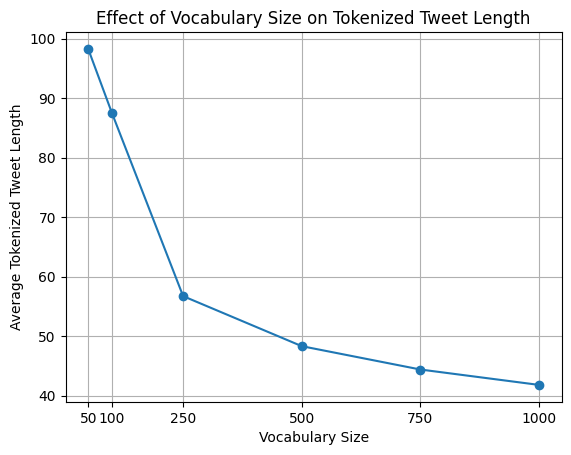

In [5]:
plt.plot(vocab_sizes, average_lengths, marker='o')
plt.xlabel('Vocabulary Size')
plt.ylabel('Average Tokenized Tweet Length')
plt.title('Effect of Vocabulary Size on Tokenized Tweet Length')
plt.xticks(vocab_sizes)
plt.grid(True)
plt.show()

### Task 2.3. Analysis on Dataset of Different Language (10 points)

In [6]:
import pandas as pd

df = pd.read_csv('dataset.csv')
df

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


In [7]:
df.language.unique()

array(['Estonian', 'Swedish', 'Thai', 'Tamil', 'Dutch', 'Japanese',
       'Turkish', 'Latin', 'Urdu', 'Indonesian', 'Portugese', 'French',
       'Chinese', 'Korean', 'Hindi', 'Spanish', 'Pushto', 'Persian',
       'Romanian', 'Russian', 'English', 'Arabic'], dtype=object)

In [8]:
french_texts = df[df['language'] == 'French']
french_strings = french_texts['Text'].tolist()
len(french_strings)

1000

In [9]:
french_strings[:5]

['association de recherche et de sauvegarde de lhistoire de roissy-en-france arshrf roissy-en-france    mémoire dun siècle  voir dans la bibliographie',
 'la chirurgie comprenant principalement lablation de la tumeur la néphrectomie élargie comprenant le plus souvent la surrénale et les ganglions situés à proximité',
 'dès les années  les communes voisines darnouville goussainville et dans une moindre mesure louvres desservies par la ligne ferroviaire paris-lille connurent une expansion démographique spectaculaire avec la création de nombreux lotissements de banlieue roissy demeurée à lécart du chemin de fer et de lindustrialisation restait un village agricole et sappauvrit progressivement le nombre de commerces passa de quatre-vingt-quatre en  à seulement dix-huit en  le même phénomène se produisit dans de nombreux autres villages du pays de france non desservis par une voie ferrée',
 'au er avril  les services asama sont actuellement effectués par des shinkansen série e et w de  à  i

In [12]:
vocab_size = [50, 100, 250, 500, 750, 1000]
average_lengths = []

for vocab_size in tqdm(vocab_size, desc='Processing vocab sizes'):
    tokenizer = BPETokenizer(french_strings, vocab_size)
    tokenizer.train()
    tokenized_tweets = [tokenizer.tokenize(tweet) for tweet in french_strings]
    print('Tokenized tweets example:', tokenized_tweets[:1])
    avg_length = sum(len(tokenized_tweet) for tokenized_tweet in tokenized_tweets) / len(tokenized_tweets)
    average_lengths.append(avg_length)

Processing vocab sizes:  17%|█▋        | 1/6 [00:05<00:27,  5.49s/it]

Tokenized tweets example: [['a', 's', 's', 'o', 'c', 'i', 'a', 't', 'i', 'o', 'n', 'd', 'e', 'r', 'e', 'c', '#', '#', 'h', 'e', 'r', '#', '#', 'c', 'h', 'e', 'e', 't', 'd', 'e', 's', 'a', '#', '#', 'u', 'v', 'e', '#', '#', 'g', 'a', 'r', 'd', '#', '#', 'e', 'd', 'e', 'l', '#', '#', 'h', 'i', 's', '#', '#', 't', 'o', '#', '#', 'i', 'r', 'e', 'd', 'e', 'r', 'o', 'i', '#', '#', 's', 's', '#', '#', 'y', '-', 'e', 'n', '-', 'f', 'r', 'a', 'n', 'c', 'e', 'a', 'r', 's', '#', '#', 'h', 'r', '#', '#', 'f', 'r', 'o', 'i', '#', '#', 's', 's', '#', '#', 'y', '-', 'e', 'n', '-', 'f', 'r', 'a', 'n', 'c', 'e', 'm', 'e', 'm', 'o', 'i', 'r', '#', '#', 'e', 'd', 'u', 'n', 's', 'i', '#', '#', 'e', 'c', '#', '#', 'l', 'e', 'v', 'o', '#', '#', 'i', 'r', 'd', 'a', 'n', 's', 'l', 'a', 'b', 'i', '#', '#', 'b', 'l', '#', '#', 'i', 'o', '#', '#', 'g', 'r', 'a', 'p', 'h', '#', '#', 'i', 'e']]


Processing vocab sizes:  33%|███▎      | 2/6 [00:11<00:23,  5.78s/it]

Tokenized tweets example: [['a', 's', 's', 'o', 'c', 'i', 'a', 't', 'i', 'o', 'n', 'de', 'r', 'e', 'c', '##', 'h', 'e', 'r', '##', 'c', 'h', 'e', 'e', 't', 'de', 's', 'a', '##', 'u', 'v', 'e', '##', 'g', 'a', 'r', 'd', '##', 'e', 'de', 'l', '##', 'h', 'i', 's', '##', 't', 'o', '##', 'i', 'r', 'e', 'de', 'r', 'o', 'i', '##', 's', 's', '##', 'y', '-', 'e', 'n', '-', 'f', 'r', 'a', 'n', 'c', 'e', 'a', 'r', 's', '##', 'h', 'r', '##', 'f', 'r', 'o', 'i', '##', 's', 's', '##', 'y', '-', 'e', 'n', '-', 'f', 'r', 'a', 'n', 'c', 'e', 'm', 'e', 'm', 'o', 'i', 'r', '##', 'e', 'd', 'u', 'n', 's', 'i', '##', 'e', 'c', '##', 'l', 'e', 'v', 'o', '##', 'i', 'r', 'd', 'a', 'n', 's', 'l', 'a', 'b', 'i', '##', 'b', 'l', '##', 'i', 'o', '##', 'g', 'r', 'a', 'p', 'h', '##', 'i', 'e']]


Processing vocab sizes:  50%|█████     | 3/6 [00:35<00:42, 14.00s/it]

Tokenized tweets example: [['as', 'so', 'ci', 'ation', 'de', 're', 'c', '##h', 'er', '##c', 'he', 'et', 'de', 'sa', '##u', 've', '##g', 'ar', 'd', '##e', 'de', 'l', '##h', 'is', '##t', 'o', '##ire', 'de', 'ro', 'i', '##s', 's', '##y', '-', 'en', '-', 'france', 'ar', 's', '##h', 'r', '##f', 'ro', 'i', '##s', 's', '##y', '-', 'en', '-', 'france', 'me', 'mo', 'i', 'r', '##e', 'd', 'un', 'si', '##e', 'c', '##le', 'v', 'o', '##i', 'r', 'dans', 'la', 'b', 'i', '##b', 'l', '##i', 'o', '##g', 'ra', 'p', 'h', '##ie']]


Processing vocab sizes:  67%|██████▋   | 4/6 [01:19<00:52, 26.01s/it]

Tokenized tweets example: [['as', 'so', 'ci', 'ation', 'de', 'rec', '##h', 'er', '##che', 'et', 'de', 'sa', '##uve', '##g', 'ard', '##e', 'de', 'l', '##h', 'is', '##to', '##ire', 'de', 'roi', '##ss', '##y', '-', 'en', '-', 'france', 'ar', 's', '##h', 'r', '##f', 'roi', '##ss', '##y', '-', 'en', '-', 'france', 'me', 'mo', 'ir', '##e', 'dun', 'si', '##ec', '##le', 'vo', '##ir', 'dans', 'la', 'bi', '##b', 'l', '##i', 'o', '##gra', 'ph', '##ie']]


Processing vocab sizes:  83%|████████▎ | 5/6 [02:22<00:39, 39.16s/it]

Tokenized tweets example: [['as', 'soci', 'ation', 'de', 'rec', '##h', 'er', '##che', 'et', 'de', 'sa', '##uve', '##g', 'ard', '##e', 'de', 'l', '##h', 'is', '##to', '##ire', 'de', 'roi', '##ss', '##y', '-', 'en', '-', 'france', 'ar', 's', '##h', 'r', '##f', 'roi', '##ss', '##y', '-', 'en', '-', 'france', 'me', 'mo', 'ir', '##e', 'dun', 'si', '##ec', '##le', 'vo', '##ir', 'dans', 'la', 'bi', '##bl', '##i', 'o', '##gra', 'ph', '##ie']]


Processing vocab sizes: 100%|██████████| 6/6 [03:40<00:00, 36.78s/it]

Tokenized tweets example: [['as', 'soci', 'ation', 'de', 'rec', '##her', '##che', 'et', 'de', 'sa', '##uve', '##g', 'ard', '##e', 'de', 'l', '##h', 'is', '##to', '##ire', 'de', 'roi', '##ss', '##y', '-', 'en', '-', 'france', 'ar', 's', '##h', 'r', '##f', 'roi', '##ss', '##y', '-', 'en', '-', 'france', 'me', 'mo', 'ir', '##e', 'dun', 'si', '##ec', '##le', 'vo', '##ir', 'dans', 'la', 'bi', '##bl', '##i', 'o', '##graph', '##ie']]


When using a BPE tokenizer and increasing the vocabulary size, the average length of a tweet decreases. This happens for several reasons:

1. **More common phrases and sequences**: With a larger vocabulary size, the BPE tokenizer can learn and include more frequent bigrams, trigrams, and longer sequences of characters in its dictionary, allowing it to encode commonly used words and common phrases as whole tokens rather than splitting them into smaller fragments.

2. **More efficient data representation**: With the increase in unique token counts, the tokenizer can more accurately represent words and phrases, reducing the need to break them down into many small tokens. For example, a phrase that might have been split into four tokens can now be encoded as a single token due to the presence of the corresponding longer token in the expanded vocabulary.

3. **Reduction in the total number of sub-tokens**: When common words or frequent sequences are contained in the dictionary as full tokens, it reduces the number of sub-tokens needed to represent a message. As a result, the original sentence or message is encoded with fewer tokens, hence the average length of a tokenized message becomes shorter.

This means that as the vocabulary size grows, the BPE tokenizer becomes more efficient in representing textual data, as each token carries more information and the total number of tokens needed to represent an entire text is reduced.

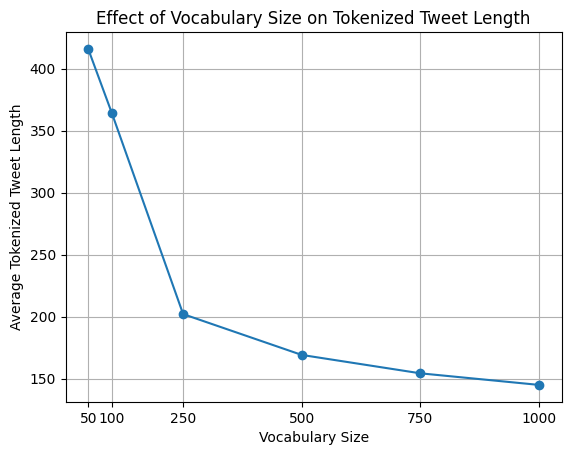

In [13]:
plt.plot(vocab_sizes, average_lengths, marker='o')
plt.xlabel('Vocabulary Size')
plt.ylabel('Average Tokenized Tweet Length')
plt.title('Effect of Vocabulary Size on Tokenized Tweet Length')
plt.xticks(vocab_sizes)
plt.grid(True)
plt.show()